In [1]:
import itertools # outputs of CNN 
import matplotlib.pyplot as plt # viz 

import cv2 # import opencv - open images with python
import numpy as np # numpy - expand_dims 

import tensorflow as tf # Main dl architecture
from tensorflow.keras.models import load_model, Sequential # Modelling

In [2]:
# Load up the existing trained model 
model = load_model('./models/teamclassifier.h5')

In [3]:
# View the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [4]:
# This represents the TRAINED intermediate layers
intermediate_layers =  model.layers[:3]

In [5]:
# The intermediate model with TRAINED existing layers
intermediate_model = Sequential(intermediate_layers)

In [6]:
# The intermediate model is now represented as just the X layers that we took
intermediate_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Determine required input shape
intermediate_model.input_shape

(None, 256, 256, 3)

In [8]:
# Load the image 
# image = cv2.imread('1619282247.jpg')
image = cv2.imread('17ykv9f8yj3ql1p8gaaqfkgiub.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

resize = cv2.resize(image, (256,256))

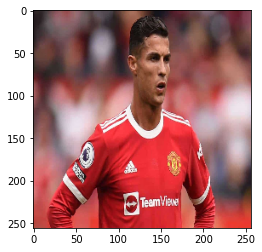

In [9]:
# Viz the resized Image
plt.imshow(resize)

In [10]:
# View the shape of the resized image
resize.shape

(256, 256, 3)

In [11]:
# Make a prediction 
yhat = intermediate_model.predict(np.expand_dims(resize,0))

1/1 [==============================] - 0s 104ms/step


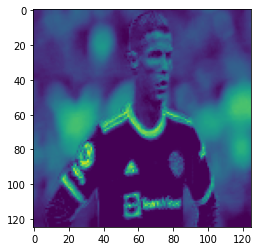

In [12]:
plt.imshow(yhat[0,:,:,7])

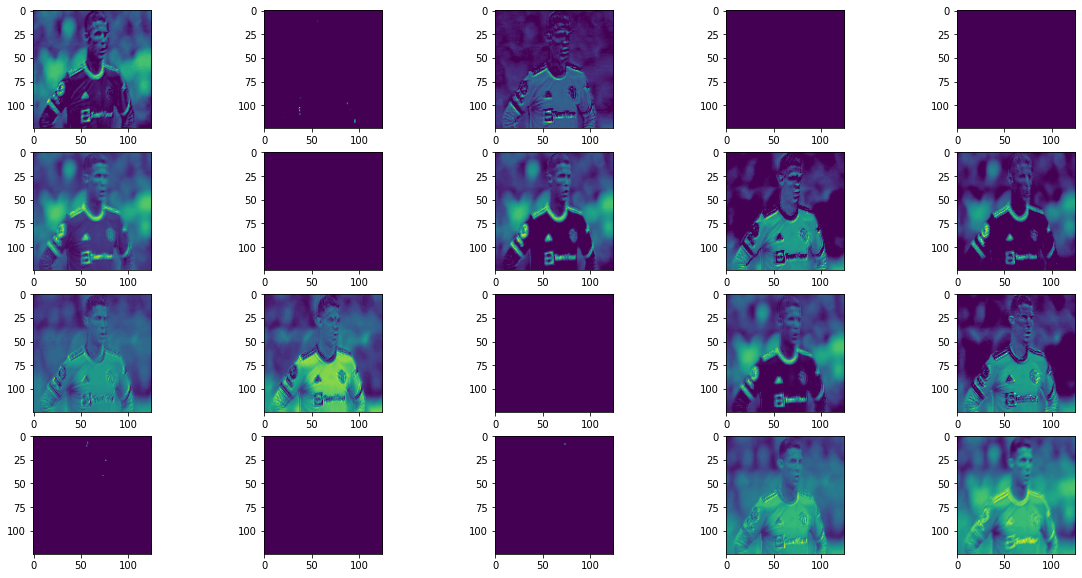

In [13]:
# Viz Grid
num_rows = 4
num_cols = 5 

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20,10))
for idx, ax_idx in enumerate(list(itertools.product(range(num_rows), range(num_cols)))):
    ax[ax_idx[0], ax_idx[1]].imshow(yhat[0,:,:,idx])